In [130]:
!pip install matplotlib

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
!pip install missingno

In [133]:
!pip install xgboost

In [134]:
import missingno as msno

from xgboost import XGBClassifier
import xgboost as xgb

In [135]:
# !pip install category_encoders

In [136]:
from category_encoders import TargetEncoder

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, f1_score
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.manifold import TSNE


In [138]:
# !pip install optuna 

In [139]:
import optuna
from optuna import Trial
from optuna.samplers import TPESampler

In [140]:
# from pandas_profiling import ProfileReport
# import sweetviz as sv

In [141]:
df = pd.read_csv('data.csv')

In [142]:
df.head()

,KEY,VAR_TARGET,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,...,VAR_41,VAR_42,VAR_43,VAR_44,VAR_45,VAR_46,VAR_47,VAR_48,VAR_49,VAR_50
0,1,0,6603,W,34.0,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,1300,NaN
1,2,1,5210,I,34.0,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,1570,1800.0
2,3,1,2505,Q,7.0,NaN,NaN,0.0,1000.0,915.0,...,269.0,1004.0,NaN,1000.0,1000.0,1560.0,553.0,1567.0,1450,1450.0
3,4,1,3902,Q,34.0,NaN,NaN,0.0,1000.0,722.0,...,30.0,16.0,NaN,1000.0,1000.0,1301.0,17.0,1301.0,2000,2000.0
4,5,1,4607,Q,34.0,11187.0,11187.0,1.0,27187.0,5436.0,...,74.0,38.0,NaN,13594.0,16000.0,1518.0,19.0,1389.0,1700,1700.0


In [143]:
df.shape

(5626, 52)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5626 entries, 0 to 5625
Data columns (total 52 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KEY         5626 non-null   int64  
 1   VAR_TARGET  5626 non-null   int64  
 2   VAR_1       5626 non-null   int64  
 3   VAR_2       5626 non-null   object 
 4   VAR_3       5622 non-null   float64
 5   VAR_4       4344 non-null   float64
 6   VAR_5       4344 non-null   float64
 7   VAR_6       5612 non-null   float64
 8   VAR_7       5612 non-null   float64
 9   VAR_8       5612 non-null   float64
 10  VAR_9       5612 non-null   float64
 11  VAR_10      5612 non-null   float64
 12  VAR_11      5316 non-null   float64
 13  VAR_12      5626 non-null   int64  
 14  VAR_13      4528 non-null   float64
 15  VAR_14      4528 non-null   float64
 16  VAR_15      1801 non-null   float64
 17  VAR_16      5598 non-null   object 
 18  VAR_17      5508 non-null   float64
 19  VAR_18      5612 non-null  

In [145]:
df.describe()

,KEY,VAR_TARGET,VAR_1,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,...,VAR_41,VAR_42,VAR_43,VAR_44,VAR_45,VAR_46,VAR_47,VAR_48,VAR_49,VAR_50
count,5626.000000,5626.000000,5626.000000,5622.000000,4344.000000,4344.000000,5612.000000,5612.000000,5612.000000,5612.000000,...,5621.000000,5621.000000,34.000000,5612.000000,4528.000000,1814.000000,5621.000000,2306.000000,5.626000e+03,3362.000000
mean,2813.500000,0.043726,3257.151973,33.639808,6513.402164,3401.622238,0.617962,9748.699572,4144.263899,1148.589095,...,2195.338730,2199.308842,3611.764706,4129.482359,2299.436617,2401.598126,2149.124177,1897.083261,6.115745e+03,3508.943783
std,1624.230638,0.204502,888.997086,5.607477,7635.750969,4629.699543,1.368544,16482.921883,8517.336280,2160.342345,...,15104.976409,15096.942980,2696.766561,4737.091335,3525.160200,2180.234920,15469.080255,1818.558706,8.491456e+04,6886.322041
min,1.000000,0.000000,1800.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1300.000000,0.000000,0.000000,25.000000,0.000000,0.000000,0.000000e+00,500.000000
25%,1407.250000,0.000000,2606.000000,34.000000,2000.000000,800.000000,0.000000,2000.000000,616.500000,160.000000,...,0.000000,0.000000,2084.500000,1201.500000,0.000000,1364.000000,0.000000,893.000000,1.650000e+03,1774.750000
50%,2813.500000,0.000000,3103.000000,34.000000,4050.000000,1800.000000,0.000000,5000.000000,2051.000000,582.000000,...,2.000000,12.000000,2985.000000,2650.000000,1000.000000,1855.500000,18.000000,1541.500000,2.500000e+03,2500.000000
75%,4219.750000,0.000000,3707.000000,34.000000,7900.000000,4200.000000,1.000000,11062.500000,4715.750000,1331.000000,...,238.000000,304.000000,3800.000000,5200.000000,3000.000000,2909.000000,328.000000,2449.000000,3.500000e+03,3600.000000
max,5626.000000,1.000000,7011.000000,81.000000,81500.000000,45000.000000,31.000000,304800.000000,178711.000000,50203.000000,...,529716.000000,543328.000000,15000.000000,43700.000000,50000.000000,55594.000000,561609.000000,29422.000000,4.200000e+06,220000.000000


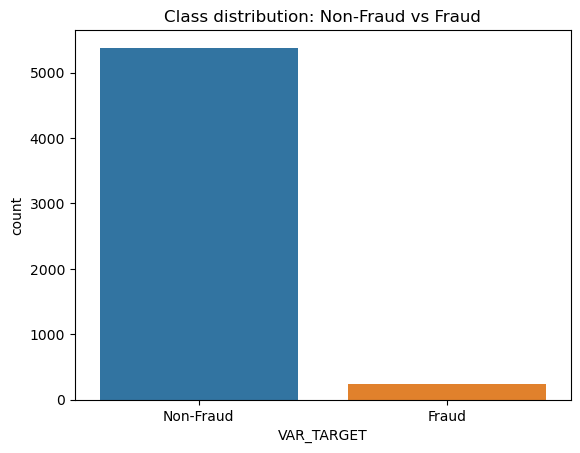

In [146]:
plt.figure()
sns.countplot(data = df, x = df.VAR_TARGET)
plt.xticks(np.arange(2), ['Non-Fraud', 'Fraud'])
plt.title('Class distribution: Non-Fraud vs Fraud')
plt.show();

In [147]:
# profileReport = ProfileReport(df)
# profileReport.to_file(output_file='ccFraudDetection_Report.html')

In [148]:
X = df.drop(['VAR_TARGET','KEY'], axis=1)  
y = df['VAR_TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)

In [149]:
X_train

,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,VAR_10,...,VAR_41,VAR_42,VAR_43,VAR_44,VAR_45,VAR_46,VAR_47,VAR_48,VAR_49,VAR_50
4299,2505,Q,34.0,1200.0,729.0,2.0,1929.0,1917.0,300.0,100.0,...,314.0,116.0,NaN,965.0,0.0,1706.0,58.0,1707.0,1701,1701.0
2519,2402,Q,34.0,1800.0,1800.0,0.0,2800.0,1056.0,1290.0,0.0,...,352.0,348.0,NaN,1400.0,1000.0,NaN,3388.0,415.0,1850,1850.0
2985,3204,Q,34.0,300.0,300.0,0.0,1300.0,740.0,109.0,0.0,...,2084.0,739.0,NaN,650.0,1000.0,2010.0,406.0,1005.0,2500,2500.0
523,3603,I,34.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,3000,NaN
3391,3507,Q,34.0,NaN,NaN,0.0,5000.0,3094.0,2622.0,0.0,...,0.0,157.0,NaN,5000.0,5000.0,3652.0,86.0,3653.0,4500,4500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,2203,W,34.0,11750.0,11750.0,0.0,11750.0,450.0,324.0,0.0,...,0.0,0.0,NaN,11750.0,NaN,NaN,0.0,NaN,3000,NaN
291,2511,Q,34.0,11750.0,1100.0,4.0,25650.0,0.0,11227.0,0.0,...,0.0,0.0,NaN,5130.0,1600.0,NaN,0.0,NaN,60000,60000.0
4758,3611,Q,34.0,3000.0,800.0,0.0,5828.0,3550.0,700.0,968.0,...,125.0,61.0,NaN,1943.0,0.0,1871.0,38.0,2748.0,1900,1900.0
5303,3511,W,34.0,750.0,750.0,0.0,750.0,746.0,336.0,0.0,...,0.0,0.0,NaN,750.0,NaN,NaN,0.0,NaN,1350,1350.0


In [150]:
X_test

,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,VAR_10,...,VAR_41,VAR_42,VAR_43,VAR_44,VAR_45,VAR_46,VAR_47,VAR_48,VAR_49,VAR_50
393,2502,Q,34.0,600.0,600.0,0.0,13850.0,3458.0,1762.0,0.0,...,28946.0,27624.0,NaN,6925.0,13250.0,NaN,15140.0,NaN,2200,2200.0
2012,5811,S,34.0,8750.0,2850.0,0.0,20650.0,14744.0,1010.0,2265.0,...,0.0,0.0,NaN,5163.0,0.0,NaN,0.0,NaN,3400,3400.0
2257,4303,W,34.0,4900.0,4900.0,1.0,4900.0,1587.0,41.0,0.0,...,0.0,0.0,NaN,4900.0,NaN,NaN,0.0,NaN,2780,NaN
2948,3908,Q,34.0,1600.0,1600.0,0.0,6200.0,4950.0,1481.0,0.0,...,5.0,202.0,NaN,3100.0,4600.0,1560.0,512.0,1560.0,2800,2800.0
281,2909,Q,34.0,NaN,NaN,3.0,0.0,0.0,0.0,0.0,...,83.0,86.0,NaN,0.0,0.0,NaN,47.0,NaN,1300,1300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281,3204,I,34.0,17600.0,1400.0,2.0,55440.0,21997.0,2160.0,930.0,...,0.0,0.0,NaN,9240.0,3150.0,NaN,0.0,NaN,15000,NaN
5609,3011,Q,34.0,3450.0,1000.0,1.0,7950.0,4156.0,900.0,0.0,...,0.0,0.0,NaN,1988.0,0.0,NaN,0.0,NaN,1800,2080.0
1267,2010,W,34.0,500.0,500.0,0.0,500.0,322.0,105.0,0.0,...,0.0,0.0,NaN,500.0,NaN,NaN,0.0,NaN,800,NaN
2497,2706,Q,34.0,NaN,NaN,0.0,3500.0,0.0,0.0,0.0,...,0.0,24.0,NaN,3500.0,3500.0,1586.0,264.0,1125.0,1600,1600.0


In [151]:
y_train.sum()

197

In [152]:
y_test.sum()

49

In [153]:
# my_report = sv.analyze(df)
# my_report.show_html("ccFraudDetection_Sweetviz.html") 

<Axes: >

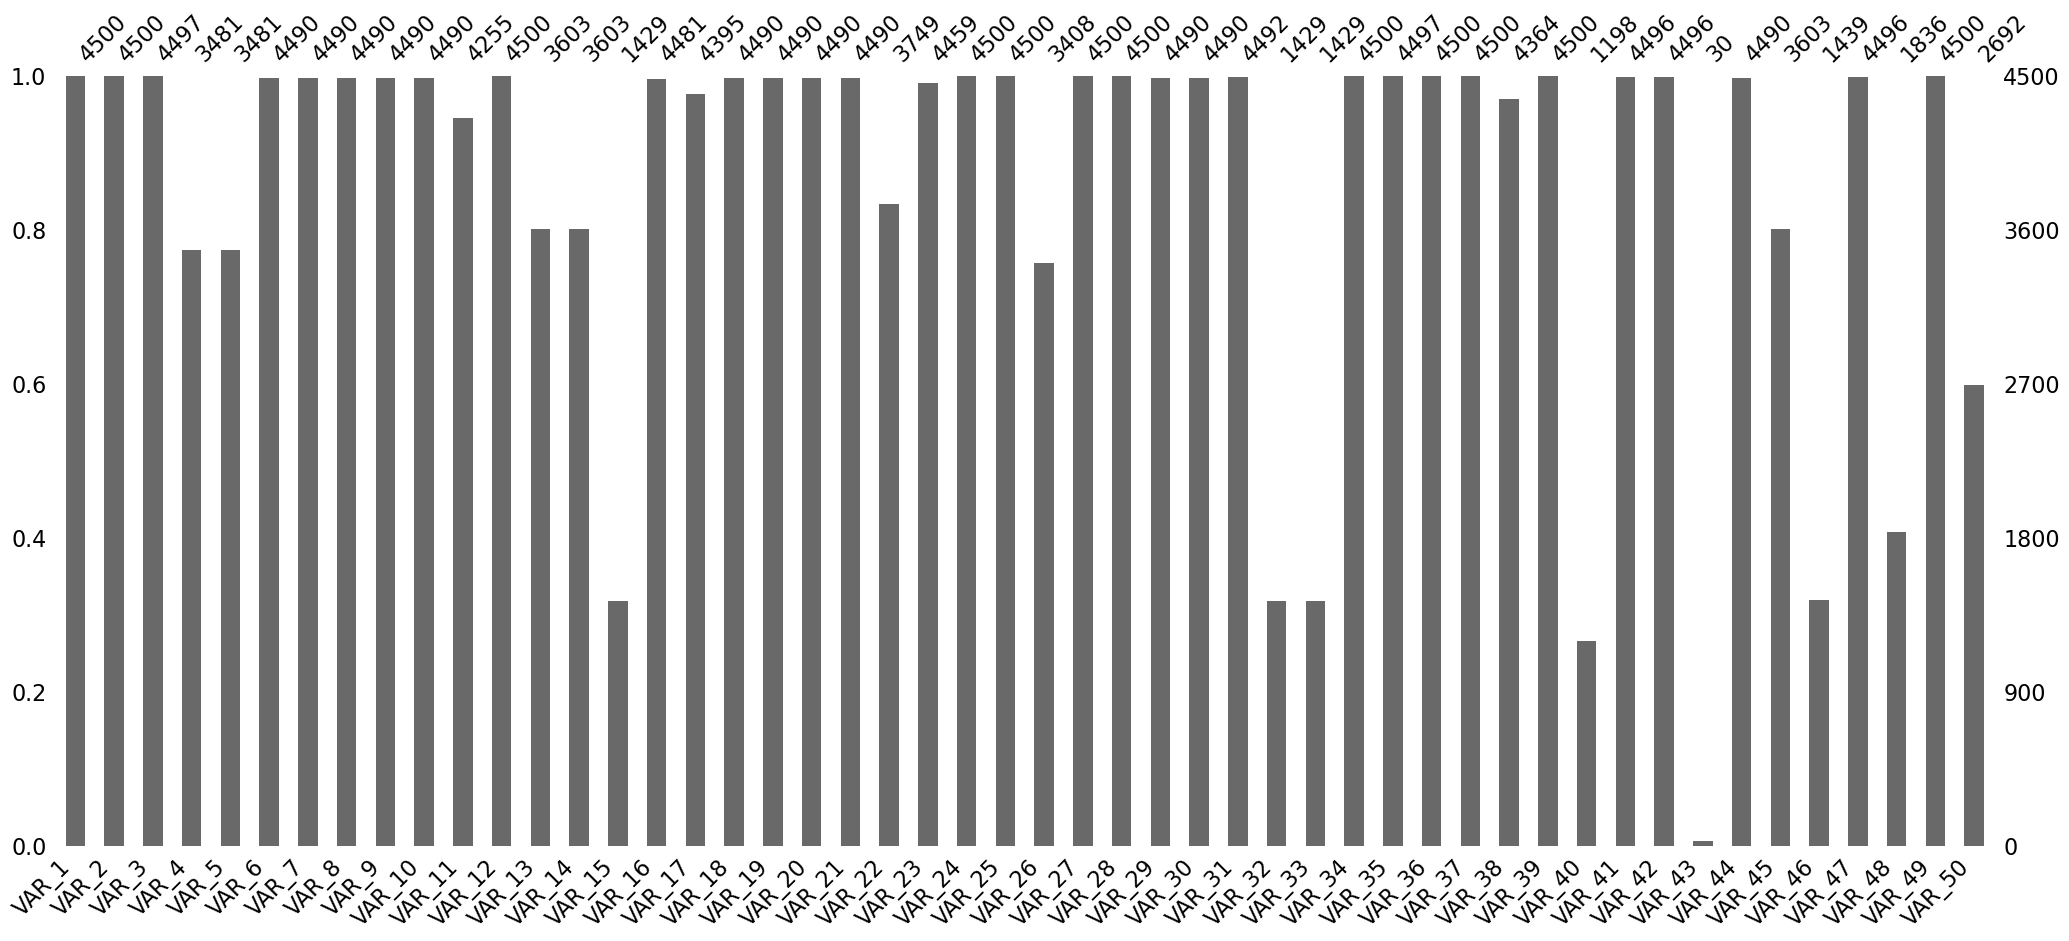

In [154]:
msno.bar(X_train)

<Axes: >

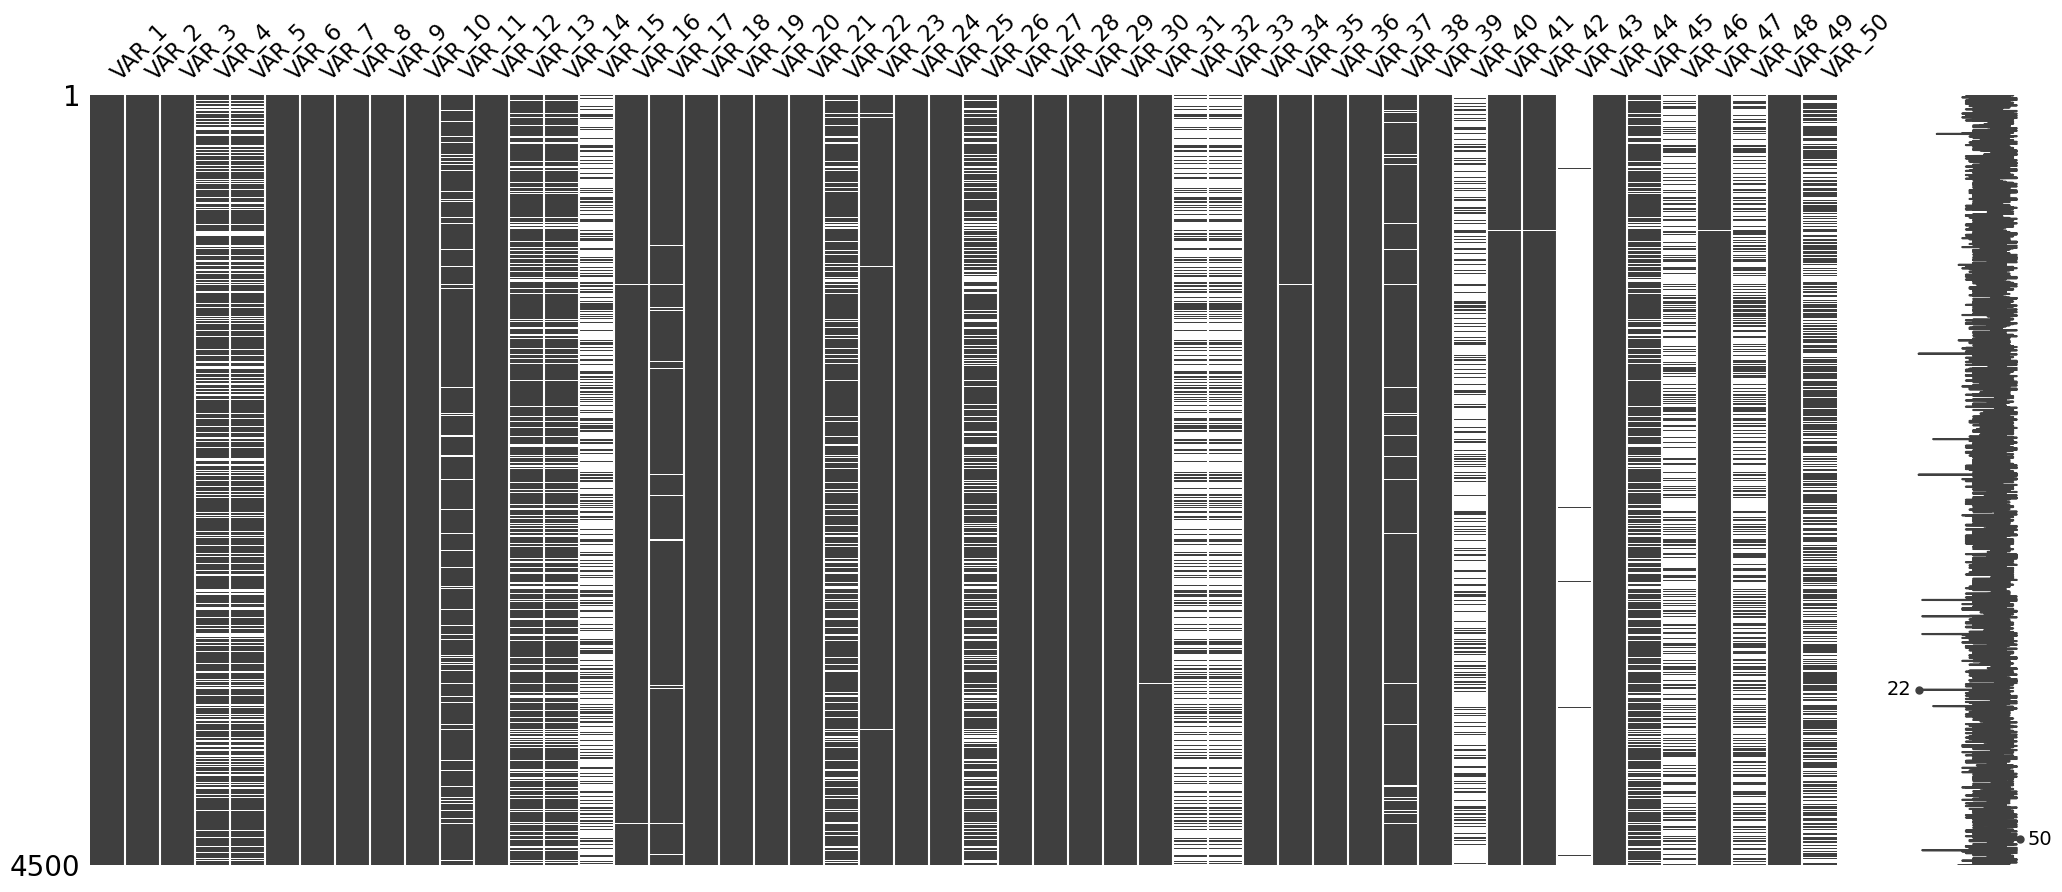

In [155]:
msno.matrix(X_train)

<Axes: >

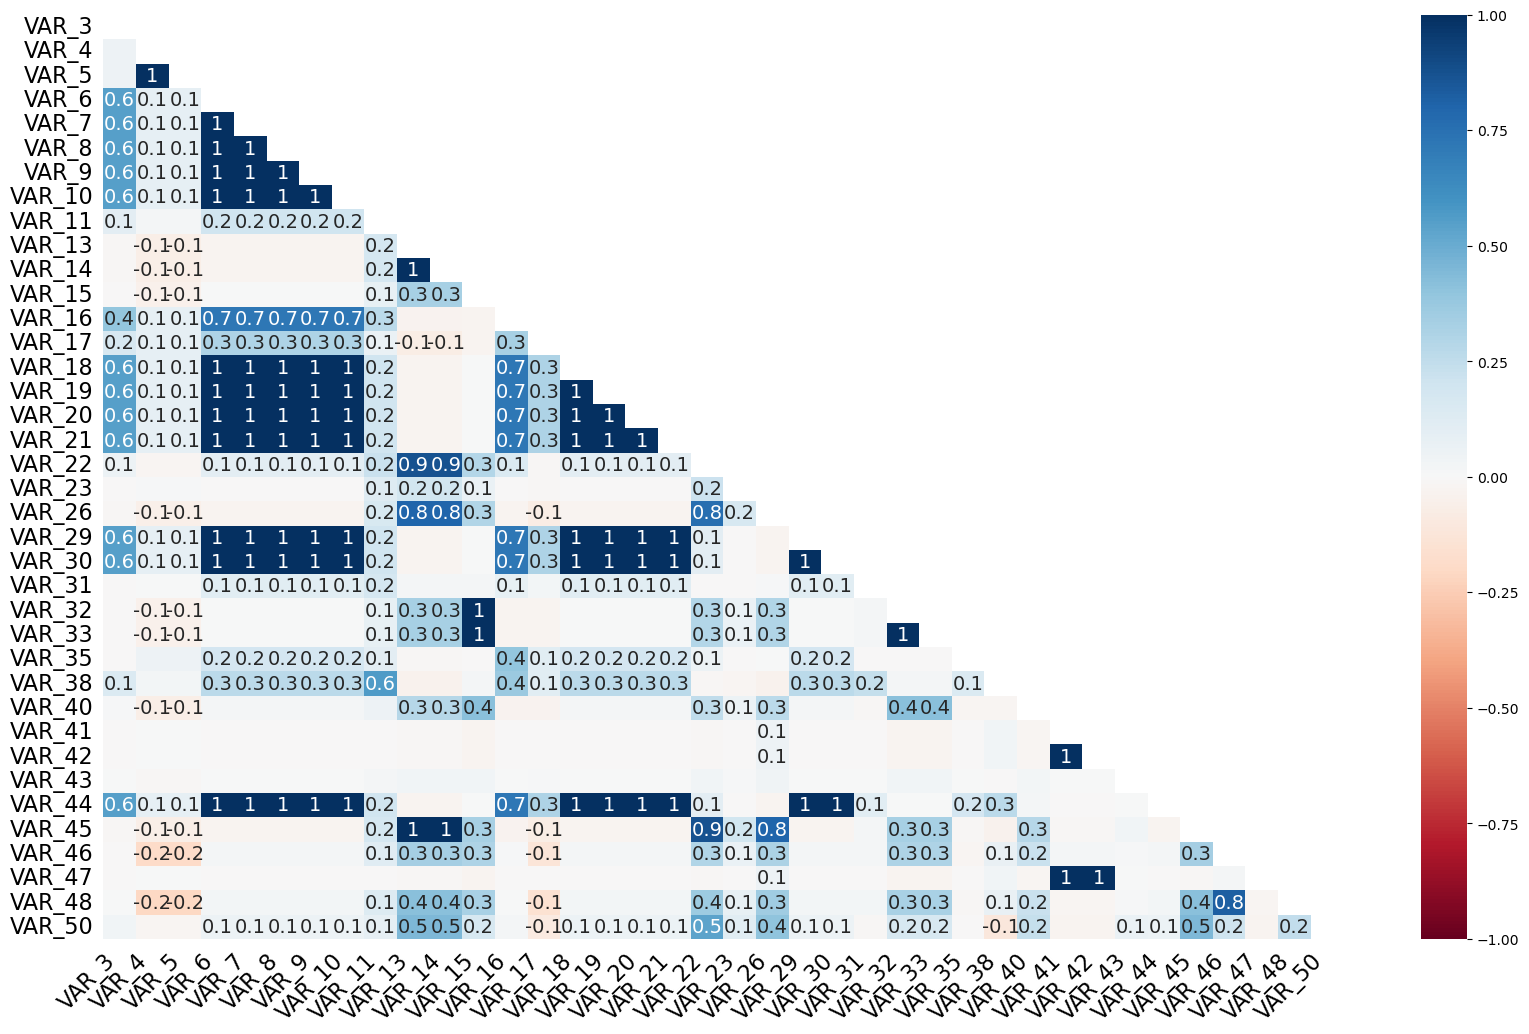

In [156]:
msno.heatmap(X_train)

In [157]:
missingValues = df.isna().sum().sort_values(ascending=False)
missingValues=missingValues[missingValues>0]

In [158]:
missingValues.sort_values()

VAR_3        4
VAR_47       5
VAR_41       5
VAR_35       5
VAR_42       5
VAR_31      11
VAR_19      14
VAR_18      14
VAR_20      14
VAR_21      14
VAR_44      14
VAR_8       14
VAR_7       14
VAR_29      14
VAR_30      14
VAR_6       14
VAR_9       14
VAR_10      14
VAR_16      28
VAR_23      48
VAR_17     118
VAR_38     179
VAR_11     310
VAR_22     924
VAR_14    1098
VAR_13    1098
VAR_45    1098
VAR_5     1282
VAR_4     1282
VAR_26    1349
VAR_50    2264
VAR_48    3320
VAR_46    3812
VAR_32    3825
VAR_33    3825
VAR_15    3825
VAR_40    4113
VAR_43    5592
dtype: int64

In [159]:
greaterThan95 = missingValues[missingValues / len(df) * 100 > 95]
    
greaterThan50AndLessThan95 = missingValues[(missingValues / len(df) * 100 > 50) & (missingValues / len(df) * 100 < 95)]
    
greaterThan25AndLessThan50 = missingValues[(missingValues / len(df) * 100 > 25) & (missingValues / len(df) * 100 < 50)]
    
greaterThan5AndLessThan25 = missingValues[(missingValues / len(df) * 100 > 5) & (missingValues / len(df) * 100 < 25)]
    
lessThan5 = missingValues[missingValues / len(df) * 100 < 5]

In [160]:
X_train

,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,VAR_10,...,VAR_41,VAR_42,VAR_43,VAR_44,VAR_45,VAR_46,VAR_47,VAR_48,VAR_49,VAR_50
4299,2505,Q,34.0,1200.0,729.0,2.0,1929.0,1917.0,300.0,100.0,...,314.0,116.0,NaN,965.0,0.0,1706.0,58.0,1707.0,1701,1701.0
2519,2402,Q,34.0,1800.0,1800.0,0.0,2800.0,1056.0,1290.0,0.0,...,352.0,348.0,NaN,1400.0,1000.0,NaN,3388.0,415.0,1850,1850.0
2985,3204,Q,34.0,300.0,300.0,0.0,1300.0,740.0,109.0,0.0,...,2084.0,739.0,NaN,650.0,1000.0,2010.0,406.0,1005.0,2500,2500.0
523,3603,I,34.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,3000,NaN
3391,3507,Q,34.0,NaN,NaN,0.0,5000.0,3094.0,2622.0,0.0,...,0.0,157.0,NaN,5000.0,5000.0,3652.0,86.0,3653.0,4500,4500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,2203,W,34.0,11750.0,11750.0,0.0,11750.0,450.0,324.0,0.0,...,0.0,0.0,NaN,11750.0,NaN,NaN,0.0,NaN,3000,NaN
291,2511,Q,34.0,11750.0,1100.0,4.0,25650.0,0.0,11227.0,0.0,...,0.0,0.0,NaN,5130.0,1600.0,NaN,0.0,NaN,60000,60000.0
4758,3611,Q,34.0,3000.0,800.0,0.0,5828.0,3550.0,700.0,968.0,...,125.0,61.0,NaN,1943.0,0.0,1871.0,38.0,2748.0,1900,1900.0
5303,3511,W,34.0,750.0,750.0,0.0,750.0,746.0,336.0,0.0,...,0.0,0.0,NaN,750.0,NaN,NaN,0.0,NaN,1350,1350.0


<Axes: >

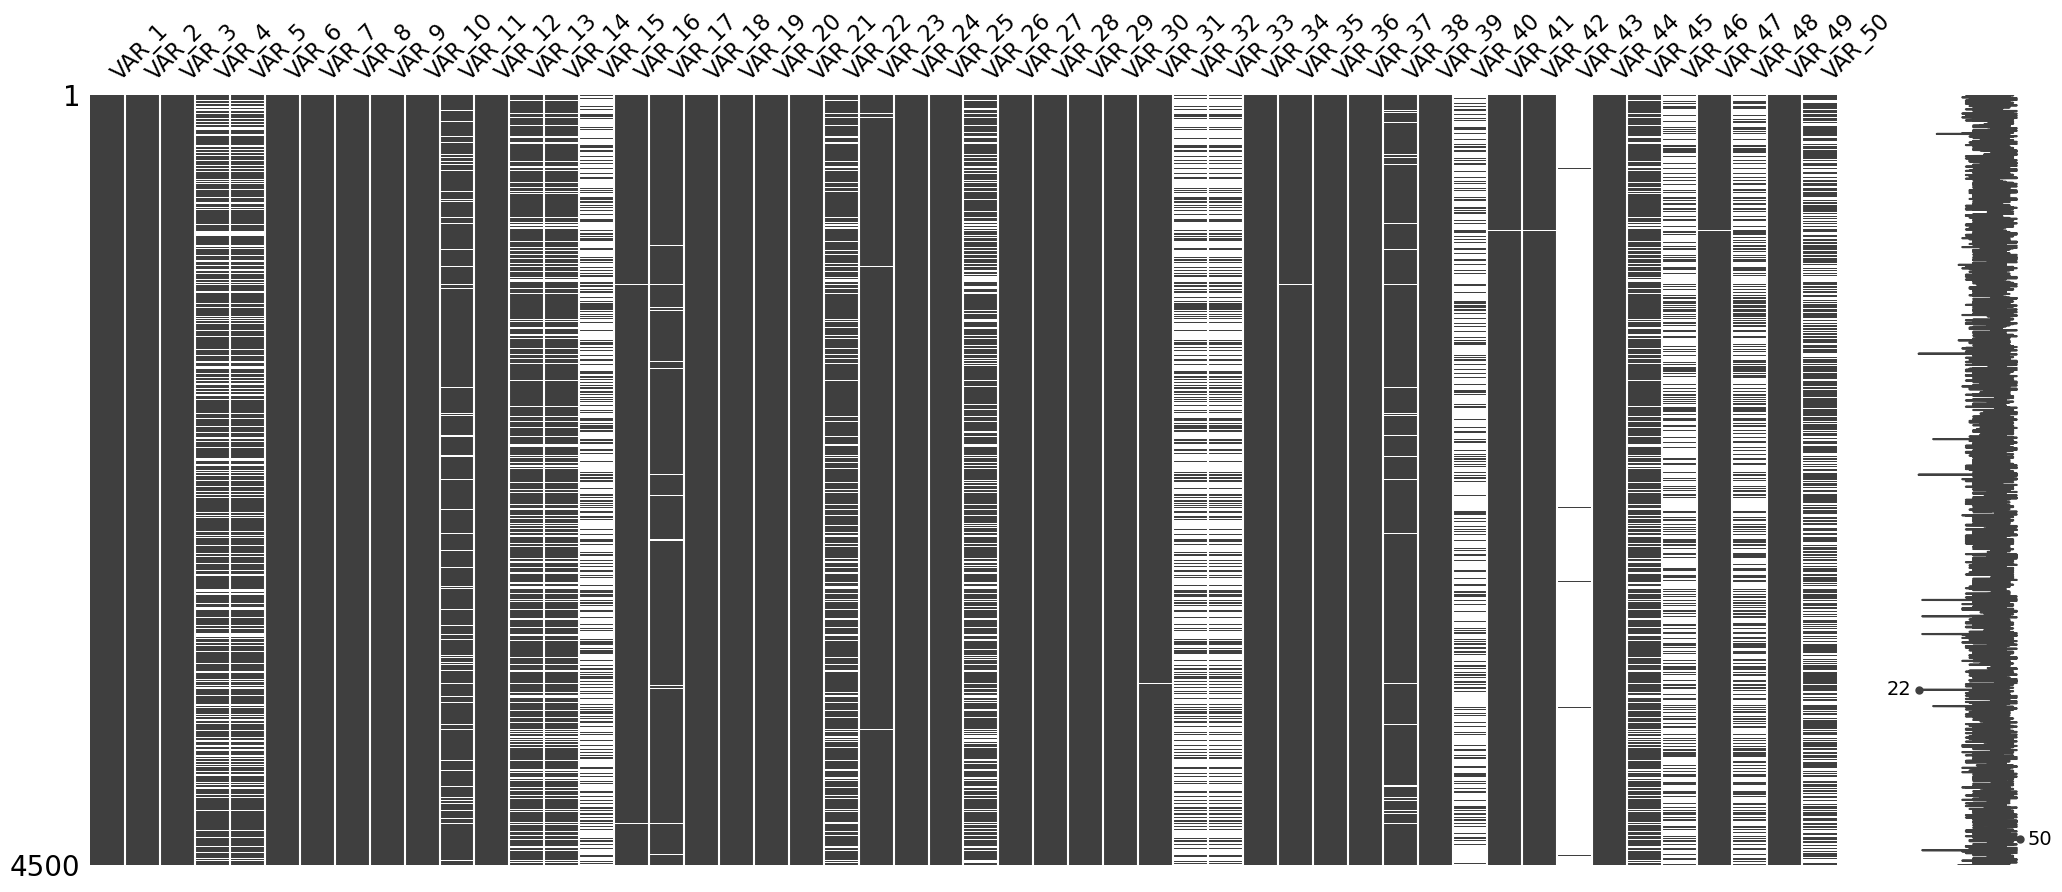

In [161]:
msno.matrix(X_train)

<Axes: >

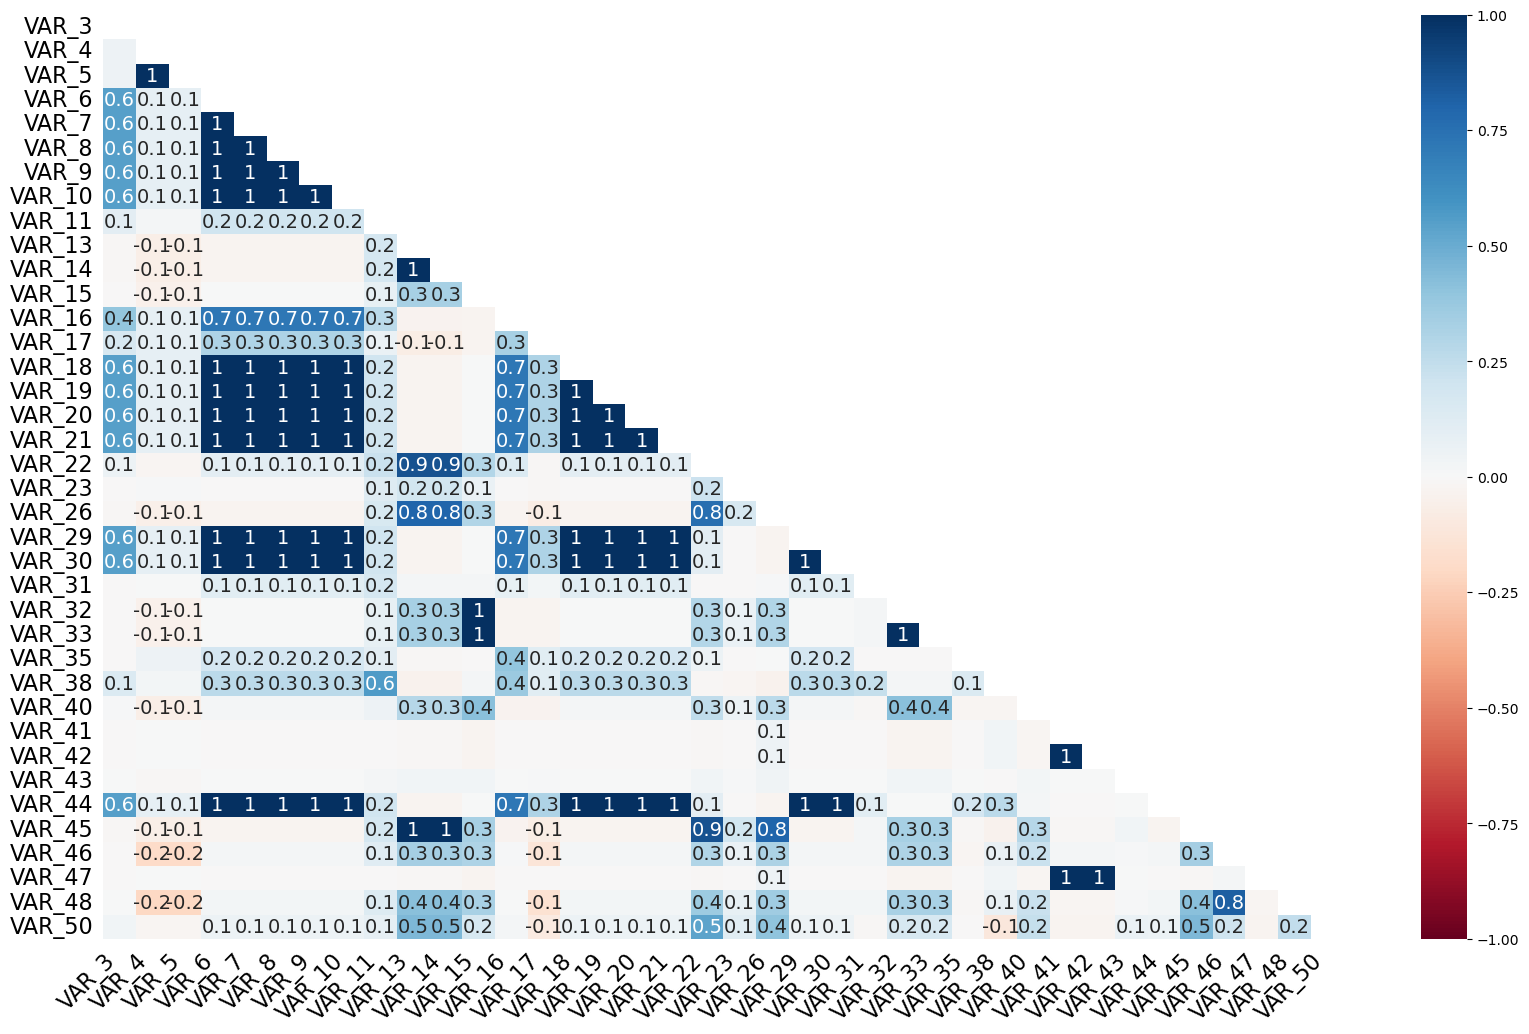

In [162]:
msno.heatmap(X_train)

In [163]:
def drop(df,droplist):
    df = df.drop(droplist, axis=1)
    return df

In [164]:
greaterThan50AndLessThan95.index.to_list()

['VAR_40', 'VAR_15', 'VAR_33', 'VAR_32', 'VAR_46', 'VAR_48']

In [165]:
# 50 ve üstü miss değerler silindi
X_train=drop(X_train,greaterThan95.index.to_list())
X_train=drop(X_train,greaterThan50AndLessThan95.index.to_list())


X_test=drop(X_test,greaterThan95.index.to_list())
X_test=drop(X_test,greaterThan50AndLessThan95.index.to_list())



In [166]:
for i in lessThan5.index.to_list():
    mode=df[i].mode().iloc[0]
    print(i,mode)

VAR_38 0.0
VAR_17 34.0
VAR_23 E
VAR_16 E
VAR_9 0.0
VAR_6 0.0
VAR_30 0.0
VAR_29 0.0
VAR_7 0.0
VAR_8 0.0
VAR_44 0.0
VAR_10 0.0
VAR_21 0.0
VAR_20 0.0
VAR_18 0.0
VAR_19 0.0
VAR_31 16.0
VAR_47 0.0
VAR_42 0.0
VAR_35 1.0
VAR_41 0.0
VAR_3 34.0


In [167]:
def fill_na(df,fill_list):
    for i in fill_list.index.to_list():
        mode=df[i].mode().iloc[0]
        df=df.fillna(mode)
    return df

In [168]:
X_train=fill_na(X_train,greaterThan25AndLessThan50)
X_train=fill_na(X_train,greaterThan5AndLessThan25)
X_train=fill_na(X_train,lessThan5)


X_test=fill_na(X_test,greaterThan25AndLessThan50)
X_test=fill_na(X_test,greaterThan5AndLessThan25)
X_test=fill_na(X_test,lessThan5)


In [169]:
X_train.isnull().sum().sort_index()

VAR_1     0
VAR_10    0
VAR_11    0
VAR_12    0
VAR_13    0
VAR_14    0
VAR_16    0
VAR_17    0
VAR_18    0
VAR_19    0
VAR_2     0
VAR_20    0
VAR_21    0
VAR_22    0
VAR_23    0
VAR_24    0
VAR_25    0
VAR_26    0
VAR_27    0
VAR_28    0
VAR_29    0
VAR_3     0
VAR_30    0
VAR_31    0
VAR_34    0
VAR_35    0
VAR_36    0
VAR_37    0
VAR_38    0
VAR_39    0
VAR_4     0
VAR_41    0
VAR_42    0
VAR_44    0
VAR_45    0
VAR_47    0
VAR_49    0
VAR_5     0
VAR_50    0
VAR_6     0
VAR_7     0
VAR_8     0
VAR_9     0
dtype: int64

In [170]:
# ### Classification Evaluation Metrics
# # sklearn'ün sunduğu classfication report ve confusion matrix, ROC Curve
# from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
# from sklearn.metrics import confusion_matrix , classification_report , accuracy_score,f1_score
# import seaborn as sns
# import matplotlib.pyplot as plt

# conf_matrix = confusion_matrix(y_test, pred)
# print(classification_report(y_test, pred))
# fig, ax =  plt.subplots(figsize = (6,6))
# sns.heatmap(conf_matrix, annot=True, fmt= "d")
# plt.ylabel("Actual")
# plt.xlabel("Prediction")
# plt.show()

In [175]:
targetencoder=TargetEncoder()
X_train_encode=targetencoder.fit_transform(X_train,y_train)
X_test_encode=targetencoder.transform(X_test,y_test)

In [180]:
X_train

,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,VAR_10,...,VAR_37,VAR_38,VAR_39,VAR_41,VAR_42,VAR_44,VAR_45,VAR_47,VAR_49,VAR_50
4299,2505,Q,34.0,1200.0,729.0,2.0,1929.0,1917.0,300.0,100.0,...,S,500.0,3,314.0,116.0,965.0,0.0,58.0,1701,1701.0
2519,2402,Q,34.0,1800.0,1800.0,0.0,2800.0,1056.0,1290.0,0.0,...,S,1100.0,0,352.0,348.0,1400.0,1000.0,3388.0,1850,1850.0
2985,3204,Q,34.0,300.0,300.0,0.0,1300.0,740.0,109.0,0.0,...,S,1003.0,0,2084.0,739.0,650.0,1000.0,406.0,2500,2500.0
523,3603,I,34.0,2000.0,2000.0,1.0,0.0,0.0,0.0,0.0,...,S,804.0,0,0.0,0.0,0.0,0.0,0.0,3000,2000.0
3391,3507,Q,34.0,2000.0,2000.0,0.0,5000.0,3094.0,2622.0,0.0,...,S,316.0,15,0.0,157.0,5000.0,5000.0,86.0,4500,4500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,2203,W,34.0,11750.0,11750.0,0.0,11750.0,450.0,324.0,0.0,...,S,8.0,0,0.0,0.0,11750.0,2000.0,0.0,3000,2000.0
291,2511,Q,34.0,11750.0,1100.0,4.0,25650.0,0.0,11227.0,0.0,...,B,501.0,0,0.0,0.0,5130.0,1600.0,0.0,60000,60000.0
4758,3611,Q,34.0,3000.0,800.0,0.0,5828.0,3550.0,700.0,968.0,...,S,104.0,3,125.0,61.0,1943.0,0.0,38.0,1900,1900.0
5303,3511,W,34.0,750.0,750.0,0.0,750.0,746.0,336.0,0.0,...,S,301.0,0,0.0,0.0,750.0,2000.0,0.0,1350,1350.0


In [181]:
X_train_encode

,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,VAR_10,...,VAR_37,VAR_38,VAR_39,VAR_41,VAR_42,VAR_44,VAR_45,VAR_47,VAR_49,VAR_50
4299,2505,0.046735,34.0,1200.0,729.0,2.0,1929.0,1917.0,300.0,100.0,...,0.040702,500.0,3,314.0,116.0,965.0,0.0,58.0,1701,1701.0
2519,2402,0.046735,34.0,1800.0,1800.0,0.0,2800.0,1056.0,1290.0,0.0,...,0.040702,1100.0,0,352.0,348.0,1400.0,1000.0,3388.0,1850,1850.0
2985,3204,0.046735,34.0,300.0,300.0,0.0,1300.0,740.0,109.0,0.0,...,0.040702,1003.0,0,2084.0,739.0,650.0,1000.0,406.0,2500,2500.0
523,3603,0.032258,34.0,2000.0,2000.0,1.0,0.0,0.0,0.0,0.0,...,0.040702,804.0,0,0.0,0.0,0.0,0.0,0.0,3000,2000.0
3391,3507,0.046735,34.0,2000.0,2000.0,0.0,5000.0,3094.0,2622.0,0.0,...,0.040702,316.0,15,0.0,157.0,5000.0,5000.0,86.0,4500,4500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,2203,0.060389,34.0,11750.0,11750.0,0.0,11750.0,450.0,324.0,0.0,...,0.040702,8.0,0,0.0,0.0,11750.0,2000.0,0.0,3000,2000.0
291,2511,0.046735,34.0,11750.0,1100.0,4.0,25650.0,0.0,11227.0,0.0,...,0.080851,501.0,0,0.0,0.0,5130.0,1600.0,0.0,60000,60000.0
4758,3611,0.046735,34.0,3000.0,800.0,0.0,5828.0,3550.0,700.0,968.0,...,0.040702,104.0,3,125.0,61.0,1943.0,0.0,38.0,1900,1900.0
5303,3511,0.060389,34.0,750.0,750.0,0.0,750.0,746.0,336.0,0.0,...,0.040702,301.0,0,0.0,0.0,750.0,2000.0,0.0,1350,1350.0


In [183]:
from imblearn.under_sampling import ClusterCentroids
undersampler = ClusterCentroids()
X_smote, y_smote = undersampler.fit_resample(X_train_encode, y_train)

c:\Users\ahmet\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [185]:
y_smote.value_counts()

0    197
1    197
Name: VAR_TARGET, dtype: int64

In [186]:
import optuna
def objective(trial):
    """Define the objective function"""

    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'mlogloss',
        'use_label_encoder': False
    }
    # Fit the model
    optuna_model = xgb.XGBClassifier(**params)
    optuna_model.fit(X_train_encode, y_train)

    # Make predictions
    y_pred = optuna_model.predict(X_test_encode)

    # Evaluate predictions
    f1score = f1_score(y_test, y_pred)
    return f1score



In [189]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

# En iyi hiperparametreleri alın
best_params = study.best_params
print("En iyi hiperparametreler:")
print(best_params)

# Optuna çıktısı ile yeni XGBoost modeli oluşturma
best_xgb_model = XGBClassifier(**best_params)
best_xgb_model.fit(X_train_encode, y_train)


[I 2023-07-21 23:44:16,646] A new study created in memory with name: no-name-100edd79-cc50-4660-a62f-6f4b05f31fe4
C:\Users\ahmet\AppData\Local\Temp\ipykernel_19160\2437941879.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\ahmet\AppData\Local\Temp\ipykernel_19160\2437941879.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
C:\Users\ahmet\AppData\Local\Temp\ipykernel_19160\2437941879.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/r

En iyi hiperparametreler:
{'max_depth': 5, 'learning_rate': 0.478261157116456, 'n_estimators': 173, 'min_child_weight': 1, 'gamma': 0.9338674911828928, 'subsample': 0.29513863899323917, 'colsample_bytree': 0.9298742525657155, 'reg_alpha': 1.668911593249075e-05, 'reg_lambda': 3.672033873090095e-06}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9298742525657155, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.9338674911828928, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.478261157116456, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=173, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [187]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))


[I 2023-07-21 23:34:40,165] A new study created in memory with name: no-name-6fff377d-6ded-4521-b9c0-4f91710c0f91
C:\Users\ahmet\AppData\Local\Temp\ipykernel_19160\2437941879.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\ahmet\AppData\Local\Temp\ipykernel_19160\2437941879.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
C:\Users\ahmet\AppData\Local\Temp\ipykernel_19160\2437941879.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/r

Number of finished trials: 20
Best trial:
  Value: 0.2352941176470588
  Params: 
    max_depth: 7
    learning_rate: 0.1325919445187544
    n_estimators: 403
    min_child_weight: 4
    gamma: 0.03924658182601024
    subsample: 0.1352201008409166
    colsample_bytree: 0.10525611253804833
    reg_alpha: 0.1431293078034112
    reg_lambda: 0.04496559524787104


In [191]:
from sklearn.metrics import accuracy_score

y_pred = best_xgb_model.predict(X_test_encode)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9422735346358793


In [192]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Precision: 0.30952380952380953
Recall: 0.2653061224489796
F1-Score: 0.2857142857142857


In [193]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[1048   29]
 [  36   13]]
